# Libraries

In [ ]:
# loading need libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# import various functions to perform classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data Exploration

In [2]:
import pandas as pd
df = pd.read_csv('/content/vgsales.csv.zip')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Report of the Dataset

The Video Game Sales (vgsales) dataset provides information about global video game sales across various platforms, genres, and regions. It contains key attributes such as Rank, Name, Platform, Year, Genre, Publisher, and sales data for different regions — including North America (NA_Sales), Europe (EU_Sales), Japan (JP_Sales), Other regions (Other_Sales), and the combined Global_Sales. The dataset appears to be mostly complete and well-structured, with only a few missing values: 271 entries lack the release year, and 58 entries are missing publisher information. Despite these minor gaps, the dataset provides a comprehensive overview of video game sales trends across time, platforms, and regions. It can be effectively used for data analysis, visualization, and predictive modeling to explore market trends, identify top-performing platforms or genres, and study regional preferences in the gaming industry.

# Data Cleaning

Thresholding for large datasets is a technique used to filter, simplify, or reduce data by applying a specific limit (threshold value) to decide which data points to keep or discard. It helps manage large volumes of data efficiently by focusing only on the most relevant or significant values.

In [36]:
Isnull = df.isnull().sum()

In [13]:
df['Year'] = df['Year'].fillna(df['Year'].mean())
df['Publisher'] = df['Publisher'].fillna('Unknown')

In [24]:
df['Year'] = df['Year'].astype(int)

In [26]:
# df.drop(columns=['Rank'], inplace=True)

In [30]:
df.drop_duplicates(inplace=True)

# Inconsistency Data

## Numerical Data Type

In [40]:
df['Check_Sum'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']


In [41]:
df.loc[df['Global_Sales'] != df['Check_Sum'], 'Global_Sales'] = df['Check_Sum']

In [42]:
df.drop(columns=['Check_Sum'], inplace=True)

<Axes: xlabel='NA_Sales', ylabel='EU_Sales'>

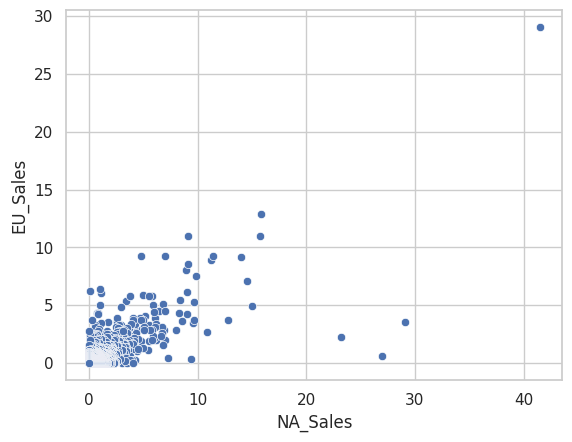

In [44]:
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=df)

# Distribution of Target Variable

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1191245032.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-1191245032.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global_Sales'], fit=stats.norm)


Text(0.5, 1.0, 'Global_Sales distribution')

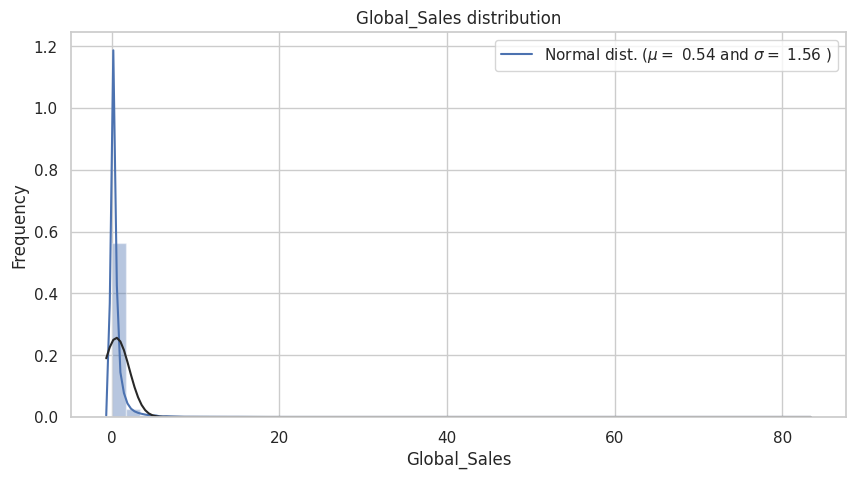

In [54]:
# fit is used for multiple plotting
# norm wil bring normal distribution
# mu is also mean used for population
# mean is used for any sample (average of the data)
# sigma standard diversion
from scipy import stats

plt.subplots(figsize=(10,5))
sns.distplot(df['Global_Sales'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(df['Global_Sales'])

#plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

In [55]:
df['Global_Sales']

,Global_Sales
0,82.74
1,40.24
2,35.83
3,33.00
4,31.38
...,...
16593,0.01
16594,0.01
16595,0.00
16596,0.01


<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3429582014.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-3429582014.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global_Sales'], fit=stats.norm)


Text(0, 0.5, 'Frequency')

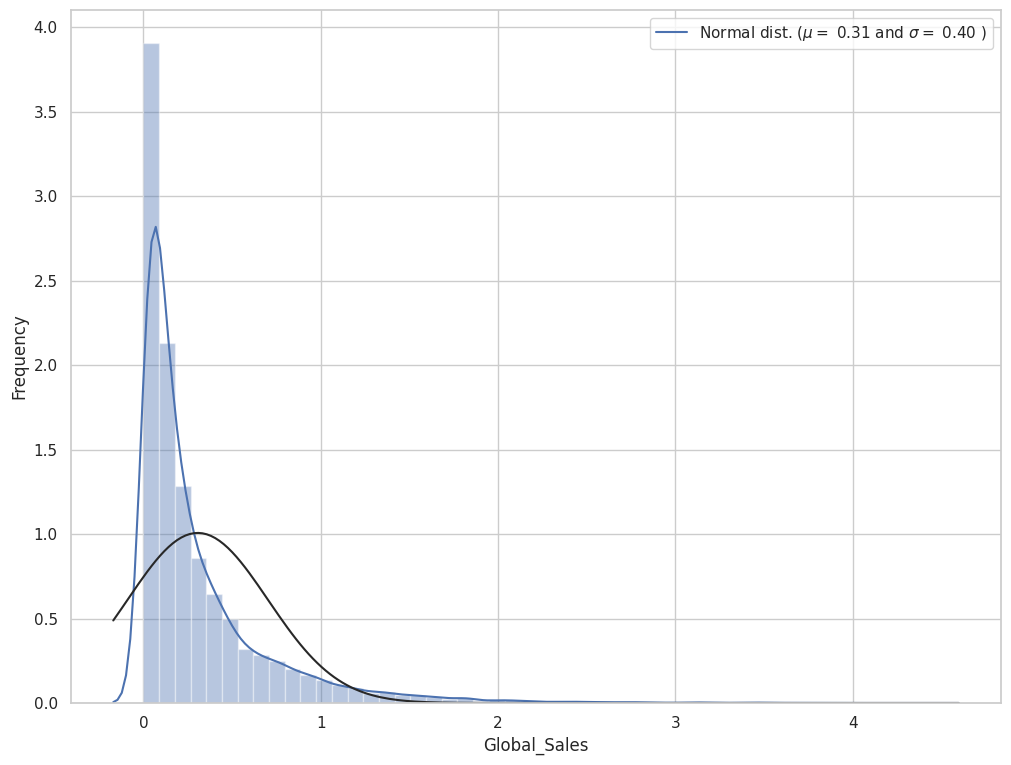

In [56]:
#we use log function which is in numpy
df['Global_Sales'] = np.log1p(df['Global_Sales'])

#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(df['Global_Sales'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['Global_Sales'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

In [57]:
df['Global_Sales']

,Global_Sales
0,4.427717
1,3.719409
2,3.606313
3,3.526361
4,3.477541
...,...
16593,0.009950
16594,0.009950
16595,0.000000
16596,0.009950


In [50]:
df['Global_Sales'][0]

np.float64(82.74000000000001)

#Finding top features of the dataset

In [58]:
# Extracting categorical columns:
catFeatures= [col for col in df.columns if col in
              df.select_dtypes(include=object).columns]

from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Data
labelEncode = LabelEncoder()

# Iterating Over each categorial features:
for col in catFeatures:
    # storing its numerical value:
    df[col] = labelEncode.fit_transform(df[col])

<Axes: >

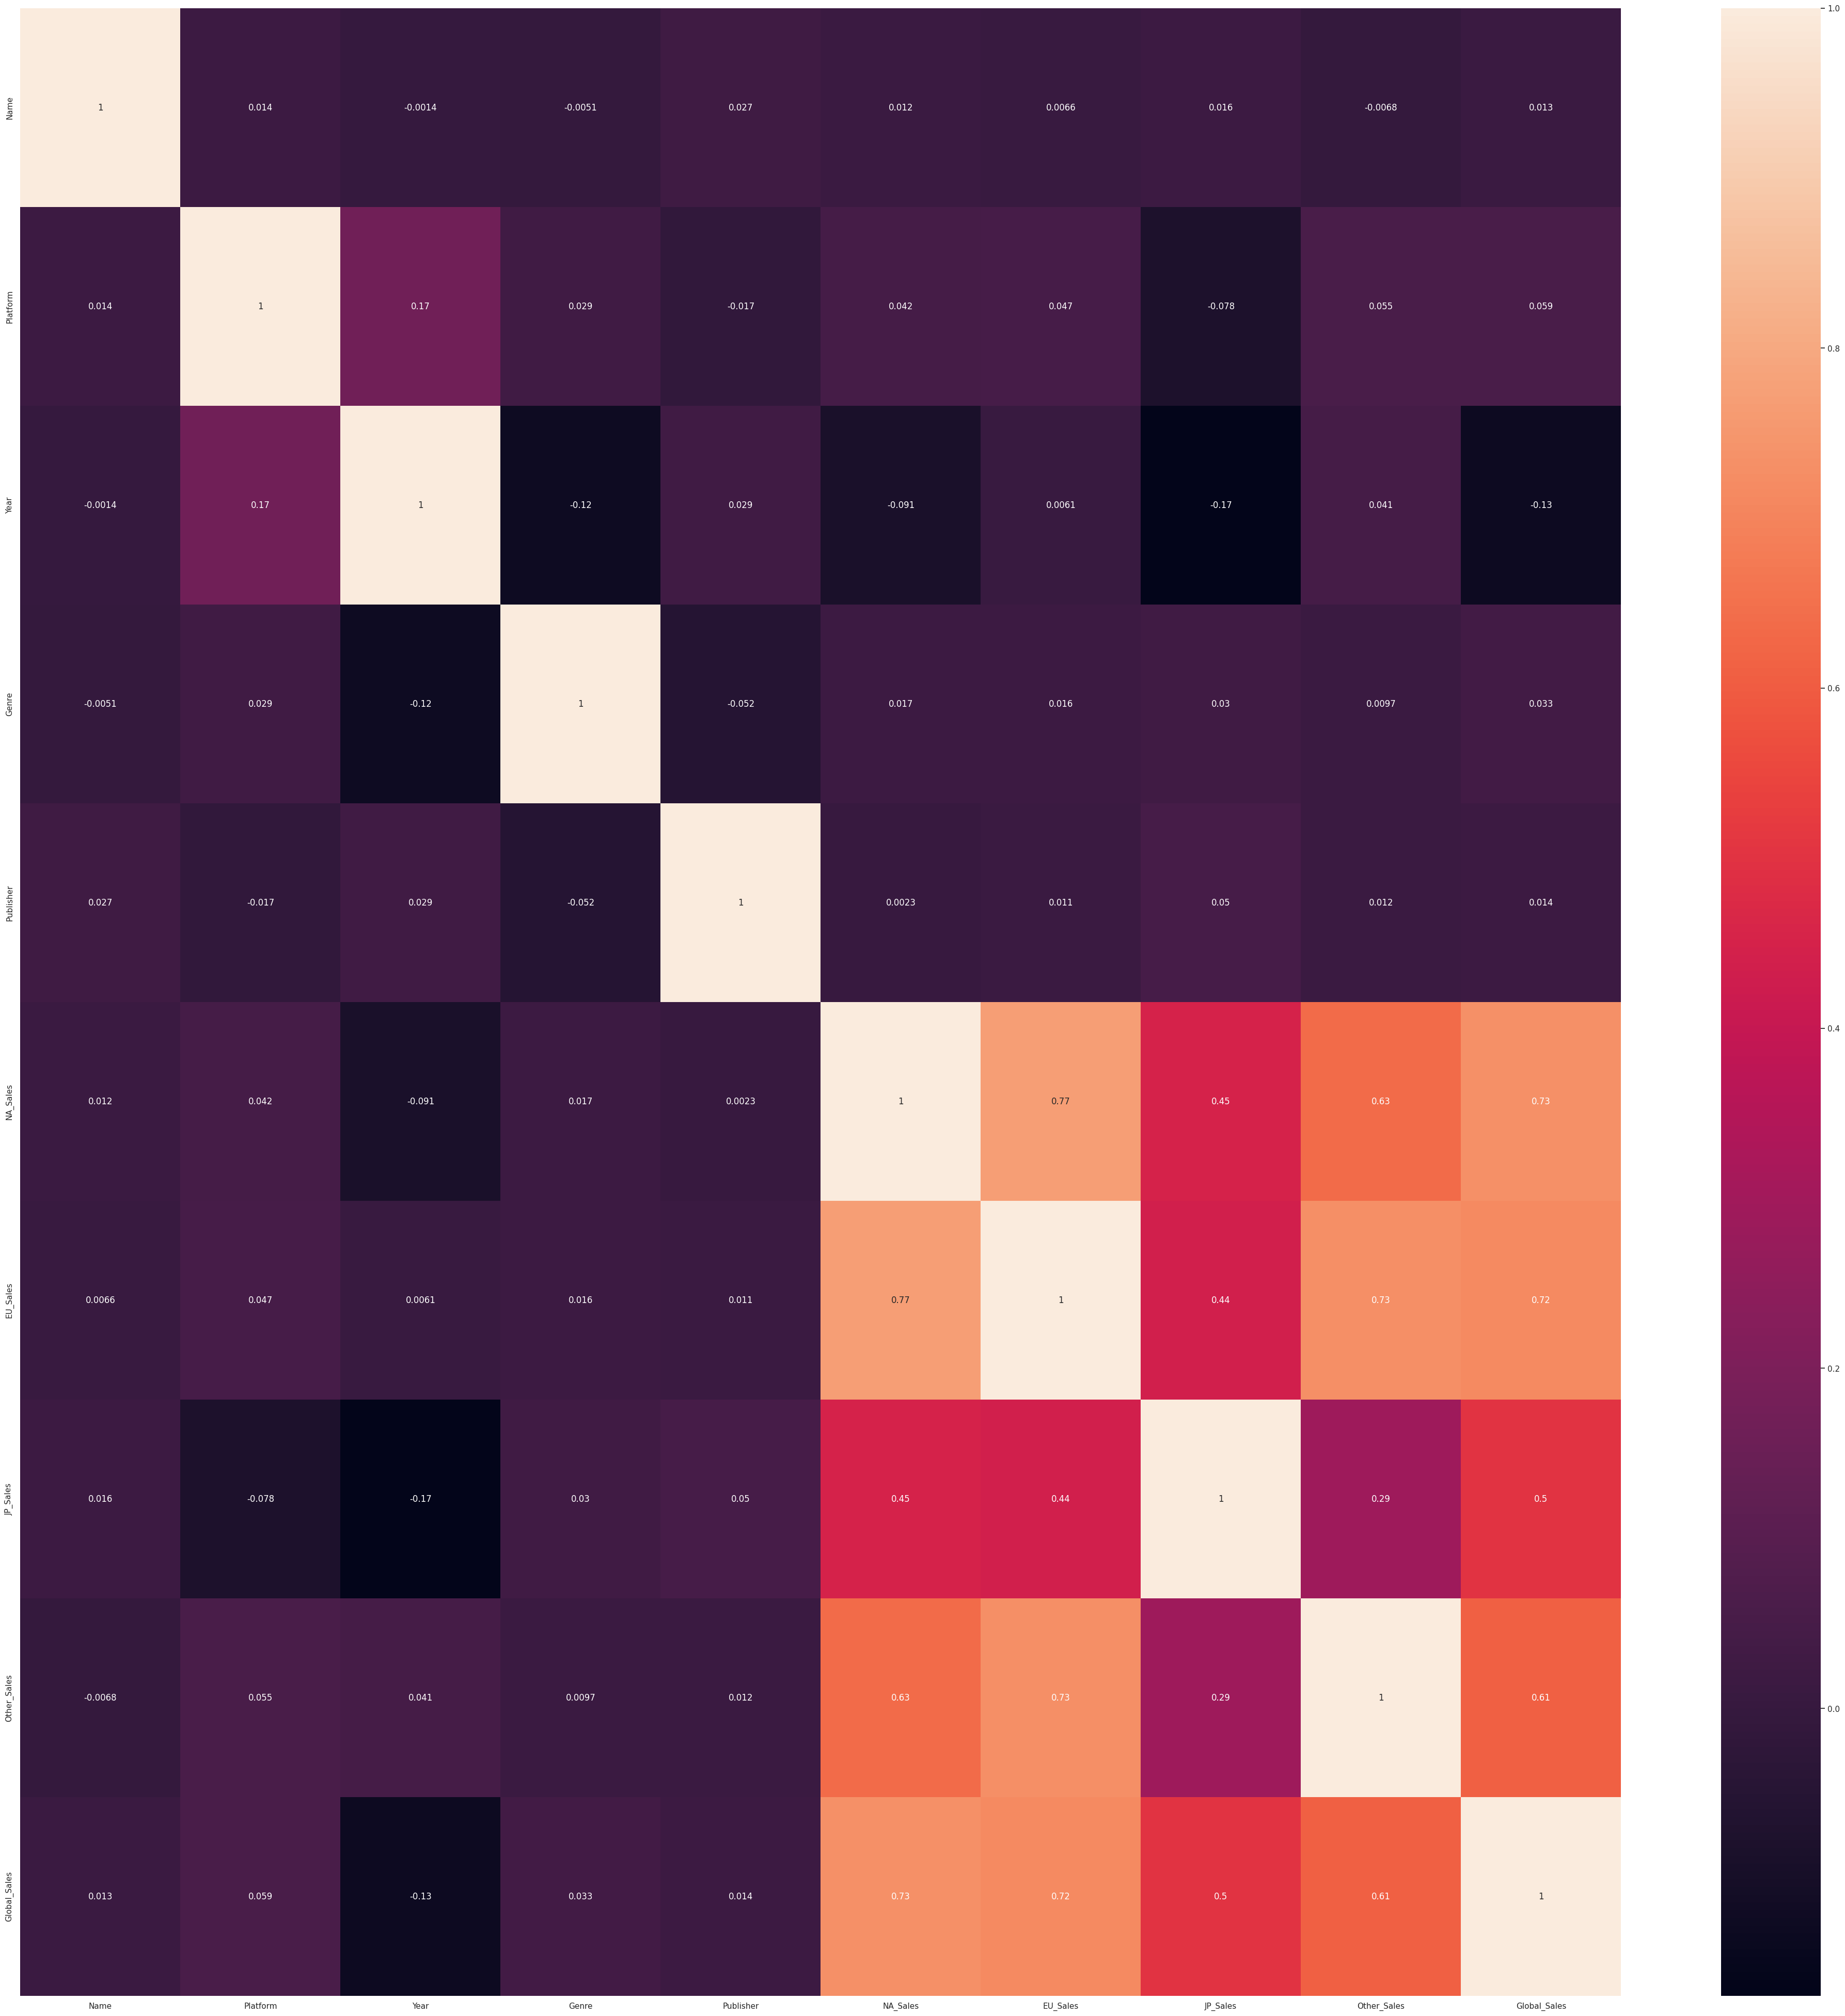

In [60]:
# Coralation Plot
corr = df.corr()
plt.subplots(figsize=(50,50))
sns.heatmap(corr, annot=True )

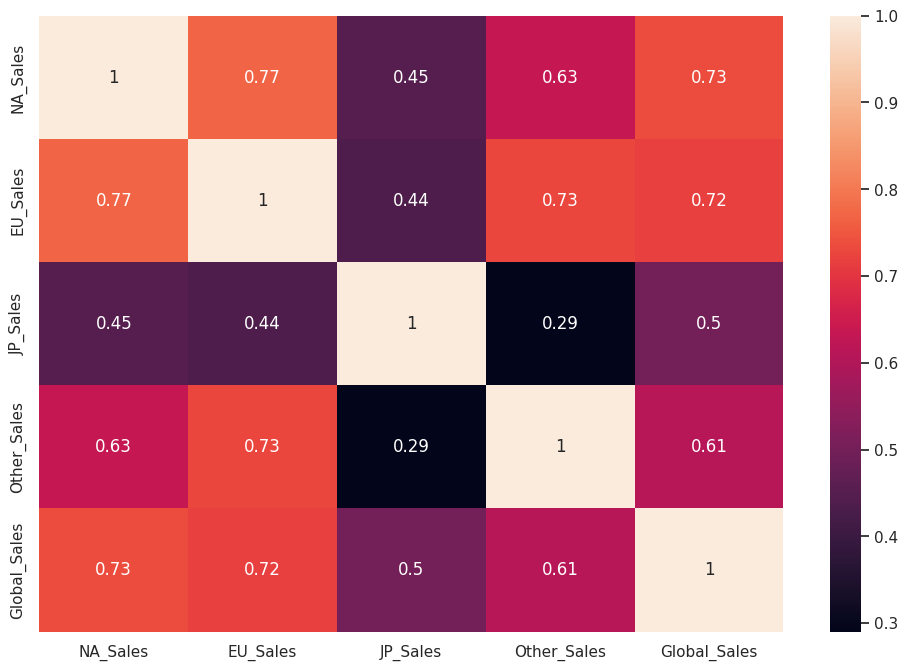

In [61]:
thres = (corr['Global_Sales'] > 0.5) | (corr['Global_Sales'] < -0.5)
top_feature = corr.index[abs(thres)]

plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [62]:
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(['Global_Sales'], ascending=False, inplace=True)
corr.Global_Sales

Find most important features relative to target


,Global_Sales
Global_Sales,1.000000
NA_Sales,0.734277
EU_Sales,0.715575
Other_Sales,0.610393
JP_Sales,0.500400
Platform,0.058908
Genre,0.033406
Publisher,0.014215
Name,0.012853
Year,-0.128761


# Preparing the data for Modeling

In [66]:
y = df['Global_Sales']
#Take their values in X and y
X = df.drop(['Global_Sales'], axis = 1).values
y = y.values

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Regression Models

## Linear Regression

Linear Regression is a simple and widely used statistical method used to predict a continuous output variable based on one or more input variables. It assumes a linear relationship between the dependent and independent variables, represented by a straight line equation. The goal of the model is to find the best-fitting line that minimizes the difference between the actual and predicted values. Linear regression is easy to understand, interpret, and implement, making it a good starting point for predictive analysis. However, it has some limitations — it only works well when the relationship between variables is linear, is sensitive to outliers, and can give misleading results if assumptions like independence or constant variance of errors are violated.

In [67]:
# y = mx+b
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
print("Accuracy --> ", model.score(X_test, y_test)*100)


print("Predict value " + str(model.predict([X_test[150]])))
print("Real value " + str(y_test[150]))

Accuracy -->  69.2709845536048
Predict value [0.20532837]
Real value 0.019802627296179712


In [68]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  69.2709845536048


In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Linear Regression
y_pred = model.predict(X_test)

#Regression Metrics
# MAE Mean absolute error ( average error)
# MSE Mean Squared error (average square error)
# RMSE root of mse
# R2 - r squared model variance
# r answer 1= perfect, more than 0.5 is okay and less than 0 is not good
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.04905431312680793
Mean Absolute Error: 0.16334564701822654
Root Mean Squared Error: 0.22148208308305195
R-squared: 0.6927098455360481


##Random Forest Regressor

Random Forest is a powerful machine learning algorithm used for both classification and regression tasks. It works by creating multiple decision trees during training and combining their results to make the final prediction — usually through majority voting for classification or averaging for regression. This ensemble approach reduces errors and prevents overfitting, making the model more accurate and stable. The main advantages of Random Forest are its high accuracy, ability to handle large and complex datasets, and its robustness against noise and overfitting. However, it also has some disadvantages — it is more complex, slower to train compared to simpler models, and harder to interpret because it combines many trees instead of producing a single clear decision path.

In [70]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)


print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))


print("Accuracy --> ", model.score(X_test, y_test)*100)

Predict value [0.19485238]
Real value 0.173953307123438
Accuracy -->  69.2709845536048


In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Linear Regression
y_pred = rfr.predict(X_test)

#Regression Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.0010178800317068796
Mean Absolute Error: 0.00732581115704618
Root Mean Squared Error: 0.03190423219115106
R-squared: 0.9936237102869953


## Decision Tree Regressor

Decision Tree is a simple and intuitive machine learning algorithm used for both classification and regression tasks. It works by splitting data into branches based on feature values, forming a tree-like structure where each internal node represents a decision on a feature, and each leaf node represents an outcome or prediction. Decision trees are easy to understand and interpret, require little data preprocessing, and can handle both numerical and categorical data. However, they have some disadvantages — they are prone to overfitting, especially with small datasets, can be unstable if small changes in data occur, and may not perform well on complex problems without pruning or ensemble methods like Random Forest.

In [73]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [74]:
print("Accuracy --> ", dt.score(X_test, y_test)*100)

Accuracy -->  99.02203972779655


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Linear Regression
y_pred = dt.predict(X_test)

#Regression Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.0015611684501227363
Mean Absolute Error: 0.012834665597904554
Root Mean Squared Error: 0.039511624240503404
R-squared: 0.9902203972779655


## Support Vector Regressor

Support Vector Regressor (SVR) is a machine learning algorithm based on the principles of Support Vector Machines (SVM) that is used for regression tasks. It works by finding a line (or hyperplane in higher dimensions) that best fits the data while keeping as many points as possible within a certain margin of tolerance. Instead of minimizing the prediction error directly, SVR tries to keep errors within a defined range, making it effective for complex and nonlinear relationships using kernel functions.

In [77]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(X_train, y_train)
print("Accuracy --> ", svr.score(X_test, y_test)*100)

Accuracy -->  -9.496274576233809


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Linear Regression
y_pred = svr.predict(X_test)

#Regression Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.17479455365731913
Mean Absolute Error: 0.24150501347101197
Root Mean Squared Error: 0.41808438580903634
R-squared: -0.0949627457623381


## Gradient Boosting Regressor

Gradient Boosting Regressor is a powerful machine learning algorithm used for regression tasks that builds an ensemble of weak learners, usually decision trees, in a sequential manner. Each new tree is trained to correct the errors made by the previous ones, gradually improving the model’s accuracy. It works by minimizing the loss function through gradient descent, which helps it learn complex patterns in the data. The main advantages of Gradient Boosting Regressor are its high prediction accuracy, ability to handle both linear and nonlinear relationships, and effectiveness with small to medium-sized datasets. However, its disadvantages include being computationally expensive, sensitive to overfitting if not properly tuned, and requiring careful adjustment of parameters like learning rate and number of trees for optimal performance.

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
gdr = GradientBoostingRegressor()

gdr.fit(X_train, y_train)
print("Accuracy --> ", gdr.score(X_test, y_test)*100)

Accuracy -->  99.39796882816968


In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Linear Regression
y_pred = gdr.predict(X_test)

#Regression Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.0009628182850857378
Mean Absolute Error: 0.012108602021453472
Root Mean Squared Error: 0.031029313319597292
R-squared: 0.9939686327116661
